In [91]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [28]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\dec-tree-practice-categorical.csv"

In [29]:
# load the training data from breast cancer data set
df = pd.read_csv(location)
df.head()

,Chest_Pain,Blocked_Arteries,Smoking,Exercise,heart_disease
0,Yes,Yes,Yes,Yes,Yes
1,No,Yes,No,Yes,Yes
2,Yes,No,Yes,No,Yes
3,Yes,Yes,Yes,No,Yes
4,No,Yes,No,Yes,No


### convert cateogorical to numeric 

#### Method - 1

- simple mapping conversion method

In [30]:
cleanup_nums = {"Chest_Pain":       {"Yes": 1, "No": 0},
                "Blocked_Arteries": {"Yes": 1, "No": 0},
                "Smoking":          {"Yes": 1, "No": 0},
                "Exercise":         {"Yes": 1, "No": 0}
               }

df.replace(cleanup_nums, inplace=True)
df.head()

,Chest_Pain,Blocked_Arteries,Smoking,Exercise,heart_disease
0,1,1,1,1,Yes
1,0,1,0,1,Yes
2,1,0,1,0,Yes
3,1,1,1,0,Yes
4,0,1,0,1,No


In [31]:
# copy the predictor variables into X and responses in y
X = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']

In [39]:
X.loc()

,Chest_Pain,Blocked_Arteries,Smoking,Exercise
0,1,1,1,1
1,0,1,0,1
2,1,0,1,0
3,1,1,1,0
4,0,1,0,1
5,0,1,0,0
6,1,0,0,1
7,1,1,1,1


In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

In [36]:
# Install windows package from: 
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Install python graphviz package (pip install graphviz)
# Add ...\Graphviz2.38\bin to User path
# Add ...\Graphviz2.38\bin\dot.exe to System Path

In [37]:
import graphviz 
from sklearn.tree import export_graphviz
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("C:\\Users\\user\\Desktop\\iris") 

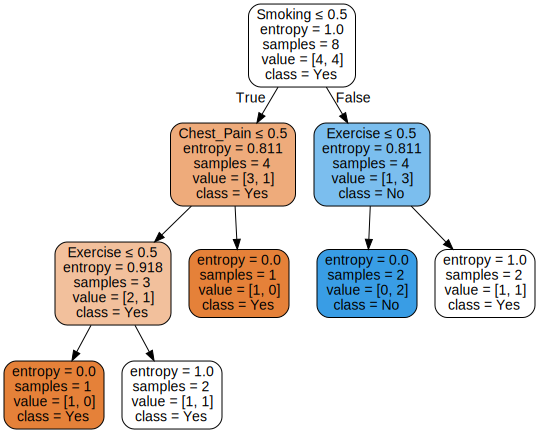

In [38]:
dot_data = export_graphviz(clf, 
                           out_file=None, 
                           feature_names=df.drop('heart_disease', 1).columns,  
                           class_names=y.unique(),  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("C:\\Users\\user\\Desktop\\dt-practice") 
graph 

#### Method - 2

- get_dummies method

In [216]:
# load the training data from breast cancer data set
df = pd.read_csv(location)

# copy the predictor variables into X and responses in y
X = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']

In [217]:
X = pd.get_dummies(X)

In [218]:
X

,Chest_Pain_No,Chest_Pain_Yes,Blocked_Arteries_No,Blocked_Arteries_Yes,Smoking_No,Smoking_Yes,Exercise_No,Exercise_Yes
0,0,1,0,1,0,1,0,1
1,1,0,0,1,1,0,0,1
2,0,1,1,0,0,1,1,0
3,0,1,0,1,0,1,1,0
4,1,0,0,1,1,0,0,1
5,1,0,0,1,1,0,1,0
6,0,1,1,0,1,0,0,1
7,0,1,0,1,0,1,0,1


In [219]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

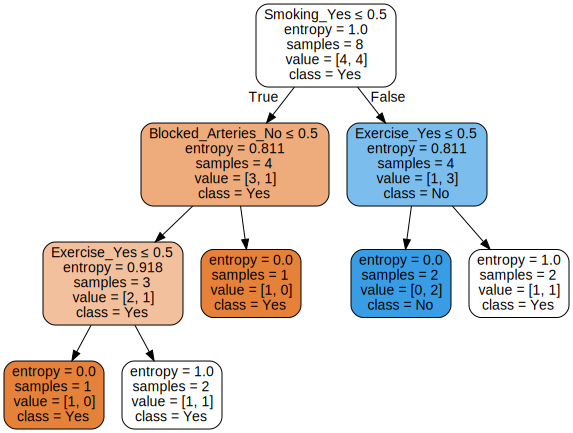

In [220]:
dot_data = export_graphviz(clf, 
                           out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("C:\\Users\\user\\Desktop\\dt-practice") 
graph 

#### Method 3

- using scikit learn LabelEncoder
- this transformation implicitly introduces an __ordering__ between classes.

In [249]:
# load the training data from breast cancer data set
df = pd.read_csv(location)

# copy the predictor variables into X and responses in y
X = df.drop(['heart_disease'], axis=1)
y = df['heart_disease']

In [261]:
# save the feature names
feature_cols = df.drop(['heart_disease'], axis=1).columns
feature_cols
# get features in numpy array form
#X = X.values

Index(['Chest_Pain', 'Blocked_Arteries', 'Smoking', 'Exercise'], dtype='object')

#### convert the categorical predictors
- First converts the classes into integers

In [253]:
# convert the categorical response variable
enc = LabelEncoder()

# first predictor column
label_encoder = enc.fit(X['Chest_Pain'])
print ("Categorical classes:", label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

integer_classes = integer_classes.reshape(len(label_encoder.classes_), 1)
print ("Integer classes    :", integer_classes)

Categorical classes: ['No' 'Yes']
Integer classes: [0 1]
Integer classes    : [[0]
 [1]]


In [254]:
Oneh_enc = OneHotEncoder(categories='auto')
Oneh_enc = Oneh_enc.fit(integer_classes)

In [255]:
# First, convert clases to 0 - (N-1) integers using label_encoder
num_of_rows = X.shape[0]

X0_encoded = label_encoder.transform(X['Chest_Pain']).reshape(num_of_rows, 1)

In [256]:
# create a sparse matrix with 2 columns, each one indicating if the instance belongs to the class
dummy_features = one_hot_encoder.transform(X0_encoded)

In [257]:
# Add the new features to X
X = np.concatenate([X, dummy_features.toarray()], axis = 1)


array([['Yes', 'Yes', 'Yes', 'Yes', 0.0, 1.0],
       ['No', 'Yes', 'No', 'Yes', 1.0, 0.0],
       ['Yes', 'No', 'Yes', 'No', 0.0, 1.0],
       ['Yes', 'Yes', 'Yes', 'No', 0.0, 1.0],
       ['No', 'Yes', 'No', 'Yes', 1.0, 0.0],
       ['No', 'Yes', 'No', 'No', 1.0, 0.0],
       ['Yes', 'No', 'No', 'Yes', 0.0, 1.0],
       ['Yes', 'Yes', 'Yes', 'Yes', 0.0, 1.0]], dtype=object)

In [258]:
# Eliminate converted columns
X = np.delete(X, [0], 1)
X

array([['Yes', 'Yes', 'Yes', 0.0, 1.0],
       ['Yes', 'No', 'Yes', 1.0, 0.0],
       ['No', 'Yes', 'No', 0.0, 1.0],
       ['Yes', 'Yes', 'No', 0.0, 1.0],
       ['Yes', 'No', 'Yes', 1.0, 0.0],
       ['Yes', 'No', 'No', 1.0, 0.0],
       ['No', 'No', 'Yes', 0.0, 1.0],
       ['Yes', 'Yes', 'Yes', 0.0, 1.0]], dtype=object)

In [259]:
# convert the 2nd predictor

enc = LabelEncoder()

label_encoder = enc.fit(df['Blocked_Arteries'])
print ("Categorical classes:", label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

integer_classes = integer_classes.reshape(len(label_encoder.classes_), 1)
print ("Integer classes    :", integer_classes)

Oneh_enc = OneHotEncoder(categories='auto')
Oneh_enc = Oneh_enc.fit(integer_classes)

# First, convert clases to 0 - (N-1) integers using label_encoder
num_of_rows = X.shape[0]

X1_encoded = label_encoder.transform(df['Blocked_Arteries']).reshape(num_of_rows, 1)

# create a sparse matrix with 2 columns, each one indicating if the instance belongs to the class
dummy_features = one_hot_encoder.transform(X1_encoded)

# Add the new features to X
X = np.concatenate([X, dummy_features.toarray()], axis = 1)

# Eliminate converted columns
X = np.delete(X, [0], 1)
X

Categorical classes: ['No' 'Yes']
Integer classes: [0 1]
Integer classes    : [[0]
 [1]]


array([['Yes', 'Yes', 0.0, 1.0, 0.0, 1.0],
       ['No', 'Yes', 1.0, 0.0, 0.0, 1.0],
       ['Yes', 'No', 0.0, 1.0, 1.0, 0.0],
       ['Yes', 'No', 0.0, 1.0, 0.0, 1.0],
       ['No', 'Yes', 1.0, 0.0, 0.0, 1.0],
       ['No', 'No', 1.0, 0.0, 0.0, 1.0],
       ['No', 'Yes', 0.0, 1.0, 1.0, 0.0],
       ['Yes', 'Yes', 0.0, 1.0, 0.0, 1.0]], dtype=object)

In [262]:
# convert the 3rd predictor

enc = LabelEncoder()

label_encoder = enc.fit(df['Smoking'])
print ("Categorical classes:", label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

integer_classes = integer_classes.reshape(len(label_encoder.classes_), 1)
print ("Integer classes    :", integer_classes)

Oneh_enc = OneHotEncoder(categories='auto')
Oneh_enc = Oneh_enc.fit(integer_classes)

# First, convert clases to 0 - (N-1) integers using label_encoder
num_of_rows = X.shape[0]

X1_encoded = label_encoder.transform(df['Smoking']).reshape(num_of_rows, 1)

# create a sparse matrix with 2 columns, each one indicating if the instance belongs to the class
dummy_features = one_hot_encoder.transform(X1_encoded)

# Add the new features to X
X = np.concatenate([X, dummy_features.toarray()], axis = 1)

# Eliminate converted columns
X = np.delete(X, [0], 1)
X

Categorical classes: ['No' 'Yes']
Integer classes: [0 1]
Integer classes    : [[0]
 [1]]


array([['Yes', 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
       ['Yes', 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       ['No', 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
       ['No', 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
       ['Yes', 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       ['No', 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       ['Yes', 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
       ['Yes', 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]], dtype=object)

In [263]:
# convert the 4th predictor

enc = LabelEncoder()

label_encoder = enc.fit(df['Exercise'])
print ("Categorical classes:", label_encoder.classes_)

integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

integer_classes = integer_classes.reshape(len(label_encoder.classes_), 1)
print ("Integer classes    :", integer_classes)

Oneh_enc = OneHotEncoder(categories='auto')
Oneh_enc = Oneh_enc.fit(integer_classes)

# First, convert clases to 0 - (N-1) integers using label_encoder
num_of_rows = X.shape[0]

X1_encoded = label_encoder.transform(df['Exercise']).reshape(num_of_rows, 1)

# create a sparse matrix with 2 columns, each one indicating if the instance belongs to the class
dummy_features = one_hot_encoder.transform(X1_encoded)

# Add the new features to X
X = np.concatenate([X, dummy_features.toarray()], axis = 1)

# Eliminate converted columns
X = np.delete(X, [0], 1)
X

Categorical classes: ['No' 'Yes']
Integer classes: [0 1]
Integer classes    : [[0]
 [1]]


array([[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]], dtype=object)

In [264]:
# Updated feature names
new_feature_names = ['chest_pain_No',
                     'chest_pain_Yes',
                     'Blocked_Arteries_No',
                     'Blocked_Arteries_Yes',
                     'Smoking_No',
                     'Smoking_Yes',
                     'Exercise_No',
                     'Exercise_yes']

In [265]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

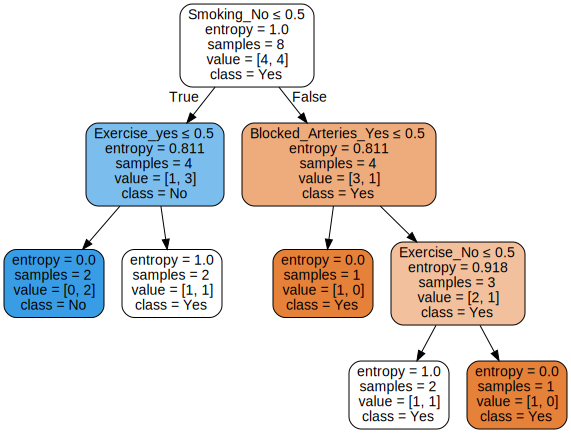

In [266]:
dot_data = export_graphviz(clf, 
                           out_file=None, 
                           feature_names=new_feature_names,  
                           class_names=y.unique(),  
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  

graph.render("C:\\Users\\user\\Desktop\\dt-practice") 
graph 